In [1]:
import pandas as pd
import numpy as np

In [5]:
train = pd.read_csv('../data/train/train.csv')
fc = pd.read_csv('../data/train/fulfilment_center_info.csv')
mlinfo = pd.read_csv('../data/train/meal_info.csv')
test = pd.read_csv('../data/test/test.csv')

In [8]:
train['type'] = 'train'
test['type'] = 'test'

In [9]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,type
0,1379560,1,55,1885,136.83,152.29,0,0,177,train
1,1466964,1,55,1993,136.83,135.83,0,0,270,train
2,1346989,1,55,2539,134.86,135.86,0,0,189,train
3,1338232,1,55,2139,339.50,437.53,0,0,54,train
4,1448490,1,55,2631,243.50,242.50,0,0,40,train


In [10]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,type
0,1028232,146,55,1885,158.11,159.11,0,0,test
1,1127204,146,55,1993,160.11,159.11,0,0,test
2,1212707,146,55,2539,157.14,159.14,0,0,test
3,1082698,146,55,2631,162.02,162.02,0,0,test
4,1400926,146,55,1248,163.93,163.93,0,0,test


In [13]:
df = pd.concat([train, test], ignore_index=True, sort=False)

In [18]:
df = train.groupby(['week', 'center_id', 'meal_id'])[['num_orders']].sum().reset_index()

In [20]:
df[(df['center_id']==55) & (df['meal_id']==1885)]

,week,center_id,meal_id,num_orders
946,1,55,1885,177
3859,2,55,1885,323
6750,3,55,1885,96
9647,4,55,1885,163
12488,5,55,1885,215
...,...,...,...,...
441209,141,55,1885,107
444465,142,55,1885,121
447724,143,55,1885,176
451026,144,55,1885,162


In [6]:
fc.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
mlinfo.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


# Plots

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [53]:
np.sum(train[train['week']==1]['num_orders'].tolist())

792261

In [48]:
a = train[['id', 'week', 'num_orders']].groupby(['week']).sum().reset_index()[['week', 'num_orders']]
b = train[['id', 'week', 'num_orders']].groupby(['week']).mean().reset_index()[['week', 'num_orders']]

In [49]:
a.head()

,week,num_orders
0,1,792261
1,2,787084
2,3,695262
3,4,743529
4,5,1198675


In [50]:
b.head()

,week,num_orders
0,1,271.136550
1,2,271.783149
2,3,239.828217
3,4,257.365524
4,5,419.263729


In [33]:
from scipy.stats import boxcox

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


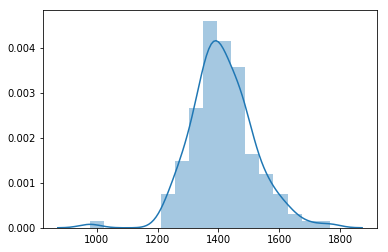

In [41]:
sns.distplot(boxcox(x=a['num_orders'])[0])

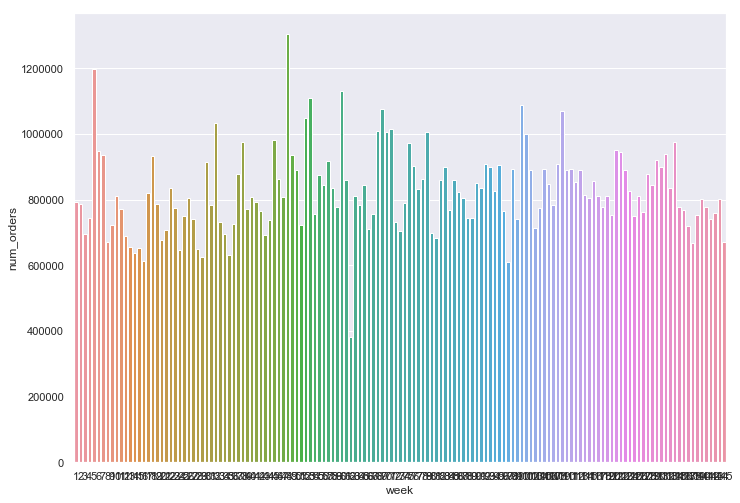

In [45]:
sns.barplot(x="week", y="num_orders", data=a)

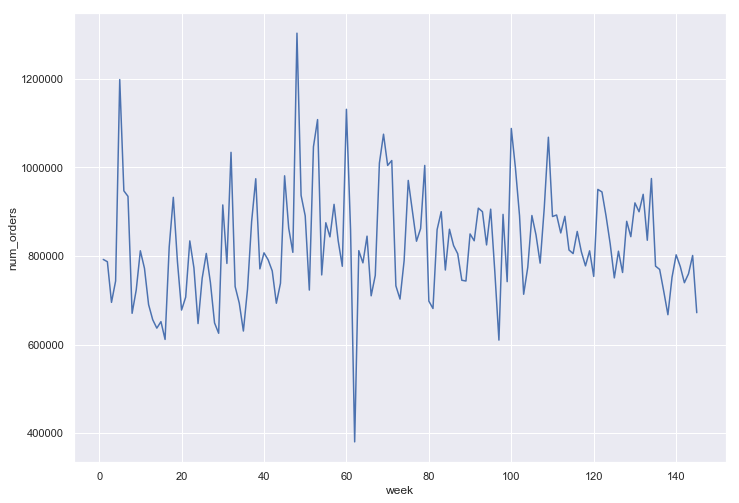

In [59]:
sns.lineplot(x="week", y="num_orders", data=a)

In [71]:
b = a['num_orders'] - a['num_orders'].shift(5)

In [72]:
a['diff'] = b

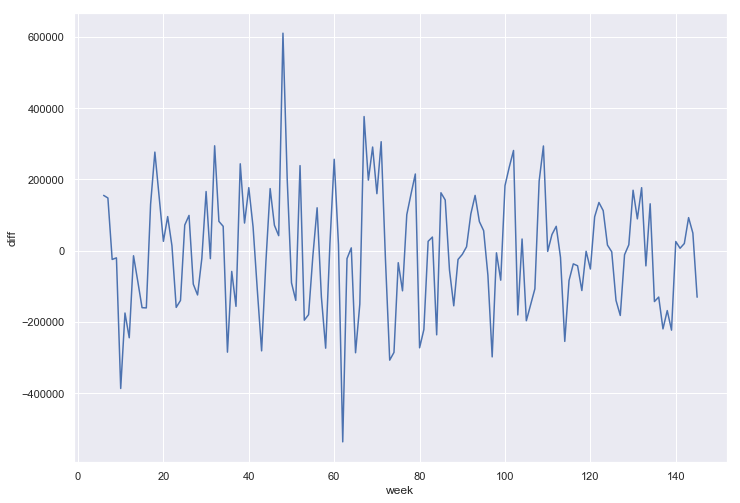

In [73]:
sns.lineplot(x="week", y="diff", data=a)

In [74]:
c = np.log(a['num_orders'])

In [76]:
a['log_num'] = c

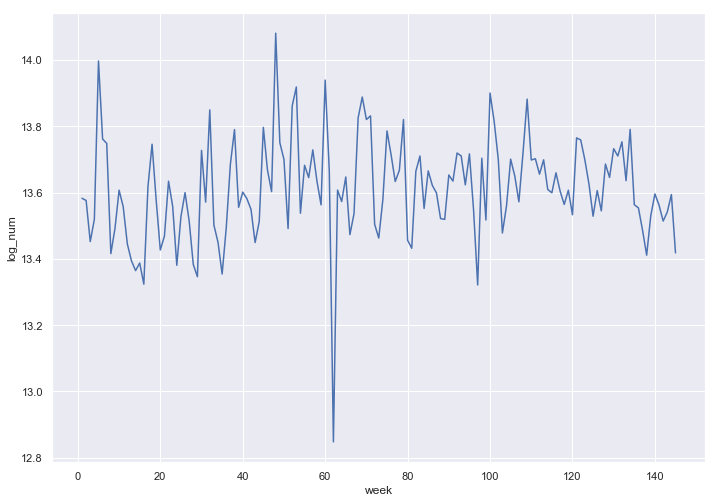

In [77]:
sns.lineplot(x="week", y="log_num", data=a)

In [81]:
a['log_diff'] = a['log_num'] - a['log_num'].shift(1)

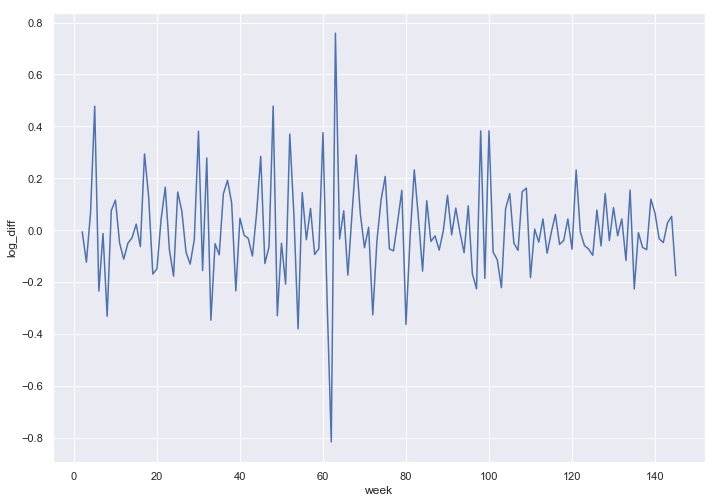

In [82]:
sns.lineplot(x="week", y="log_diff", data=a)

In [83]:
import statsmodels.api as sm

In [84]:
import scipy.stats as stats

We check the distribution of our data using QQ plot, which gives us an indication regarding our data

2

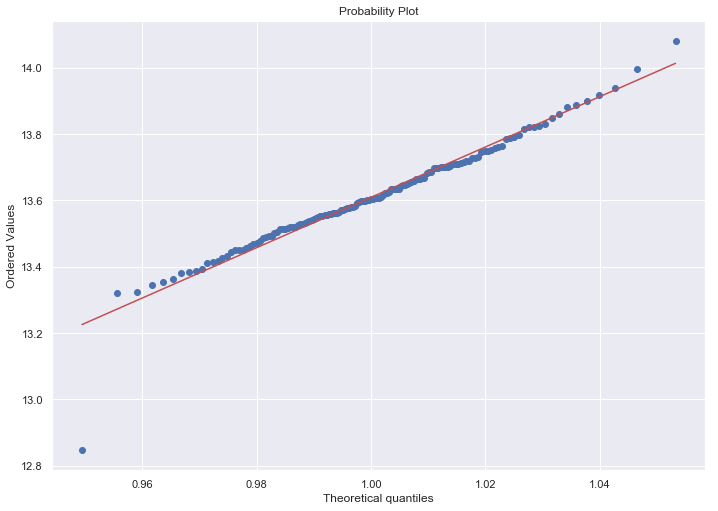

In [122]:
len(stats.probplot(a['log_num'],plot=plt, dist=stats.lognorm, sparams=(0.02,)))